# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# **Try forcasting for one user**

In [ ]:
user_balance_data = pd.read_csv('/content/one_user_data.csv')
user_balance_data['date'] = pd.to_datetime(user_balance_data['date'])
user_balance_data['date'] = pd.to_datetime(user_balance_data['date'], utc=True).dt.tz_localize(None)
user_balance_data.head()

NameError: name 'pd' is not defined

In [ ]:
color_pal = sns.color_palette()
user_balance_data.plot(style='.',
          figsize=(5, 2.5),
          ms=1,
          color=color_pal[0],
          title='user_balance_data')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
train_data = user_balance_data.rename(columns={'date':'ds',
                     'balance':'y'})
train_data


In [ ]:
%%time
model = Prophet()
model.fit(train_data)

In [ ]:
future = model.make_future_dataframe(periods=10)  # Predict for 10 additional time steps
forecast = model.predict(future)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [ ]:
fig = model.plot_components(forecast)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data', color='blue')
plt.plot(forecast[forecast['ds'] > '2024-12-07']['ds'],
         forecast[forecast['ds'] > '2024-12-07']['yhat'],
         label='Forecast', color='red')


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train Data and Forecast')
plt.legend()

plt.show()

# **Admin Forecasting**

In [5]:
users = pd.read_csv('/content/users.csv')
transactions = pd.read_csv('/content/total_transactions.csv')
deposits = pd.read_csv('/content/total_deposit.csv')
withdrawals = pd.read_csv('/content/total_withdrawal.csv')
payments = pd.read_csv('/content/total_payment.csv')
transfers = pd.read_csv('/content/total_transfer.csv')
profits = pd.read_csv('/content/total_profit.csv')


users.rename(columns={'reg_year': 'year', 'reg_month': 'month', 'reg_day': 'day', 'total_registered_users': 'y'}, inplace=True)
deposits.rename(columns={'transaction_year': 'year', 'transaction_month': 'month', 'transaction_day': 'day', 'total_deposit': 'y'}, inplace=True)
withdrawals.rename(columns={'transaction_year': 'year', 'transaction_month': 'month', 'transaction_day': 'day', 'total_withdrawal': 'y'}, inplace=True)
payments.rename(columns={'transaction_year': 'year', 'transaction_month': 'month', 'transaction_day': 'day', 'total_payment': 'y'}, inplace=True)
transfers.rename(columns={'transaction_year': 'year', 'transaction_month': 'month', 'transaction_day': 'day', 'total_transfer': 'y'}, inplace=True)
profits.rename(columns={'transaction_year': 'year', 'transaction_month': 'month', 'transaction_day': 'day', 'total_profit': 'y'}, inplace=True)


users['ds'] = pd.to_datetime(users[['year', 'month', 'day']])
transactions['ds'] = pd.to_datetime(transactions[['year', 'month', 'day']])
deposits['ds'] = pd.to_datetime(deposits[['year', 'month', 'day']])
withdrawals['ds'] = pd.to_datetime(withdrawals[['year', 'month', 'day']])
payments['ds'] = pd.to_datetime(payments[['year', 'month', 'day']])
transfers['ds'] = pd.to_datetime(transfers[['year', 'month', 'day']])
profits['ds'] = pd.to_datetime(profits[['year', 'month', 'day']])

users = users[['ds','y']]
transactions = transactions[['ds','y']]
deposits = deposits[['ds','y']]
withdrawals = withdrawals[['ds','y']]
payments = payments[['ds','y']]
transfers = transfers[['ds','y']]
profits = profits[['ds','y']]

In [6]:
profits.head()

,ds,y
0,2021-01-01,3318.66
1,2021-01-02,2912.76
2,2021-01-03,2656.12
3,2021-01-04,3304.25
4,2021-01-05,2333.90


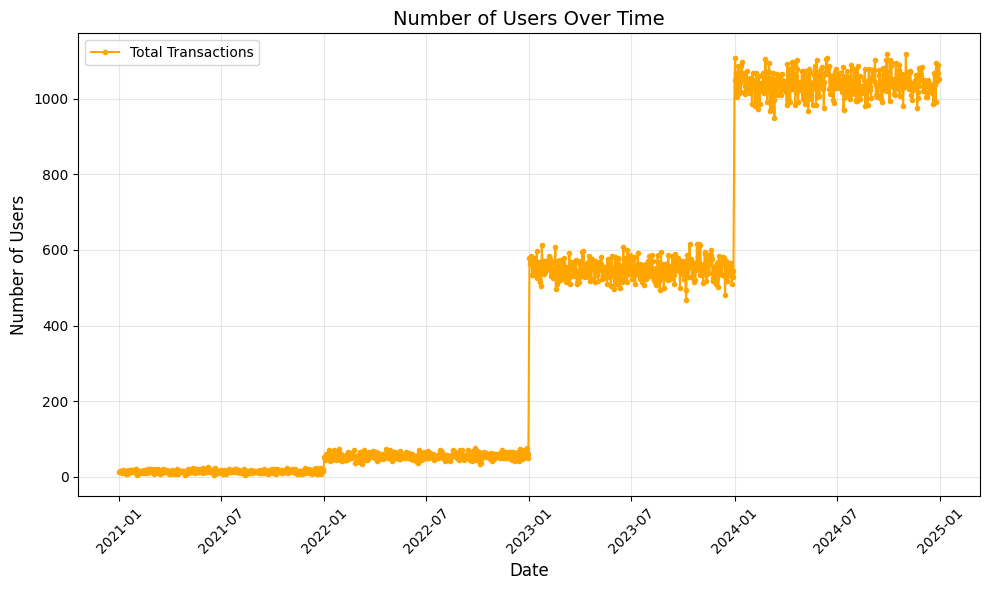

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(users['ds'], users['y'], marker='.', linestyle='-', color='orange', label='Total Transactions')
plt.title("Number of Users Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

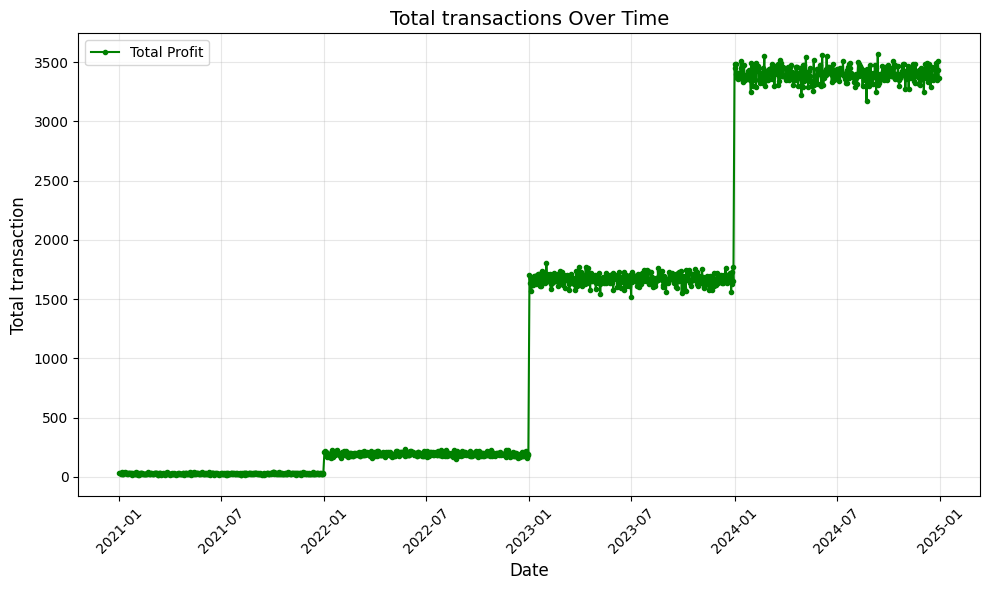

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(transactions['ds'], transactions['y'], marker='.', linestyle='-', color='green', label='Total Profit')
plt.title("Total transactions Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total transaction", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

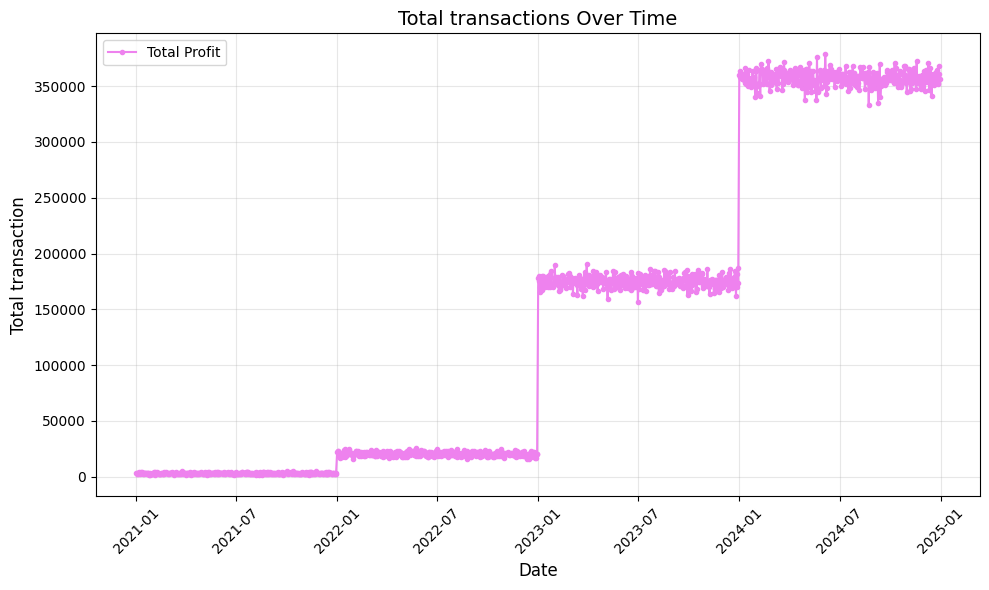

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(profits['ds'], profits['y'], marker='.', linestyle='-', color='violet', label='Total Profit')
plt.title("Total transactions Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total transaction", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

preparing data for training training/test split

In [13]:
split_index = int(len(users) * 0.8)
train_users = users[:split_index].reset_index()
test_users = users[split_index:].reset_index()


split_index = int(len(transactions) * 0.8)
train_transactions = transactions[:split_index].reset_index()
test_transactions = transactions[split_index:].reset_index()


split_index = int(len(deposits) * 0.8)
train_deposits = deposits[:split_index].reset_index()
test_deposits = deposits[split_index:].reset_index()


split_index = int(len(withdrawals) * 0.8)
train_withdrawals = withdrawals[:split_index].reset_index()
test_withdrawals = withdrawals[split_index:].reset_index()


split_index = int(len(payments) * 0.8)
train_payments = payments[:split_index].reset_index()
test_payments = payments[split_index:].reset_index()


split_index = int(len(transfers) * 0.8)
train_transfers = transfers[:split_index].reset_index()
test_transfers = transfers[split_index:].reset_index()


split_index = int(len(profits) * 0.8)
train_profits = profits[:split_index]
test_profits = profits[split_index:]

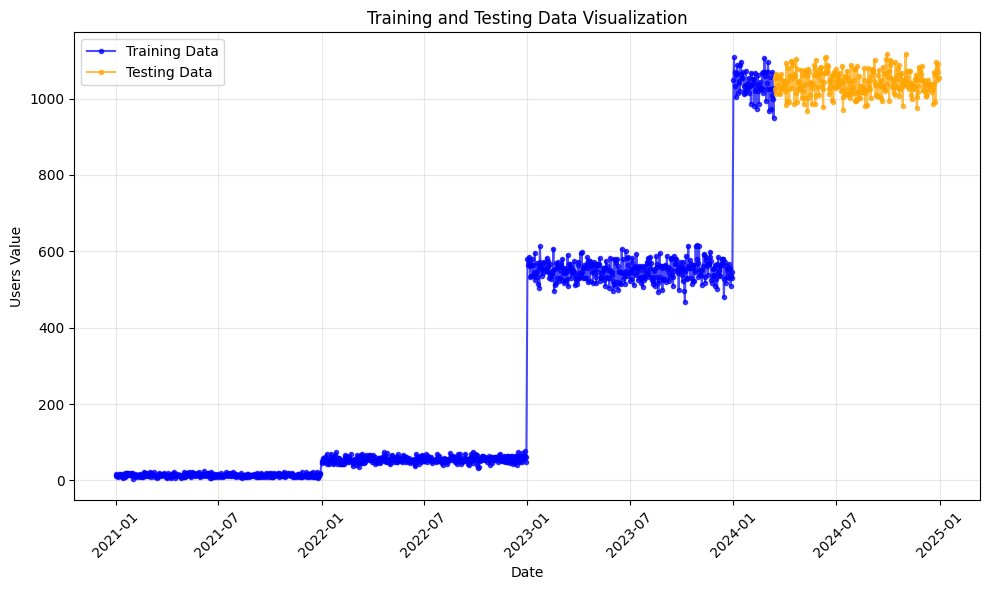

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(train_users['ds'], train_users['y'], marker='.', linestyle='-', label='Training Data', color='blue', alpha=0.7)
plt.plot(test_users['ds'], test_users['y'], marker='.', linestyle='-', label='Testing Data', color='orange', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Users Value')
plt.title('Training and Testing Data Visualization')
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

train the 3 models

In [ ]:
users_model = Prophet()
transactions_model = Prophet()
transfers_model = Prophet()
deposits_model = Prophet()
withdrawals_model = Prophet()
payments_model = Prophet()
profits_model = Prophet()

users_model.fit(train_users)
transactions_model.fit(train_transactions)
transfers_model.fit(train_transfers)
deposits_model.fit(train_deposits)
withdrawals_model.fit(train_withdrawals)
payments_model.fit(train_payments)
profits_model.fit(train_profits)

In [17]:
test_users_forcast = users_model.predict(test_users)
test_transactions_forcast = users_model.predict(test_transactions)
test_deposits_forcast = users_model.predict(test_deposits)
test_withdrawals_forcast = users_model.predict(test_withdrawals)
test_payments_forcast = users_model.predict(test_payments)
test_transfers_forcast = users_model.predict(test_transfers)
test_profits_forcast = users_model.predict(test_profits)

In [18]:
test_users_forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2024-03-14,1025.889491,965.980055,1081.404950
1,2024-03-15,1025.622963,965.586128,1082.807989
2,2024-03-16,1030.632133,973.421057,1087.378547
3,2024-03-17,1034.024850,977.346344,1093.302475
4,2024-03-18,1037.305953,983.008370,1090.795255


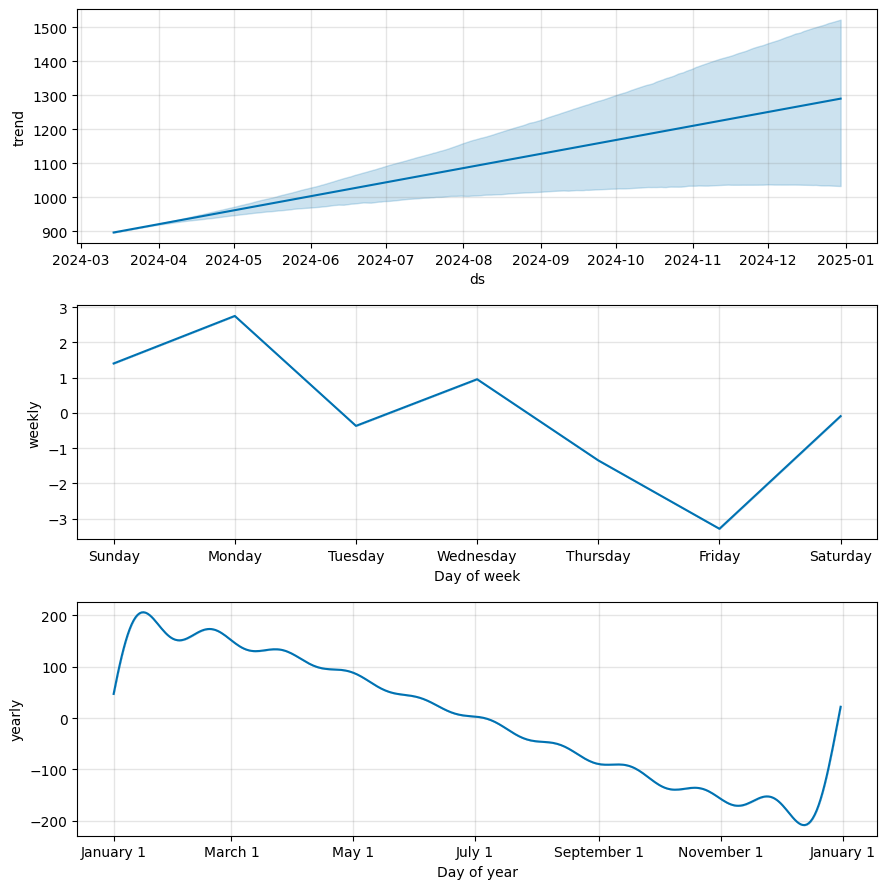

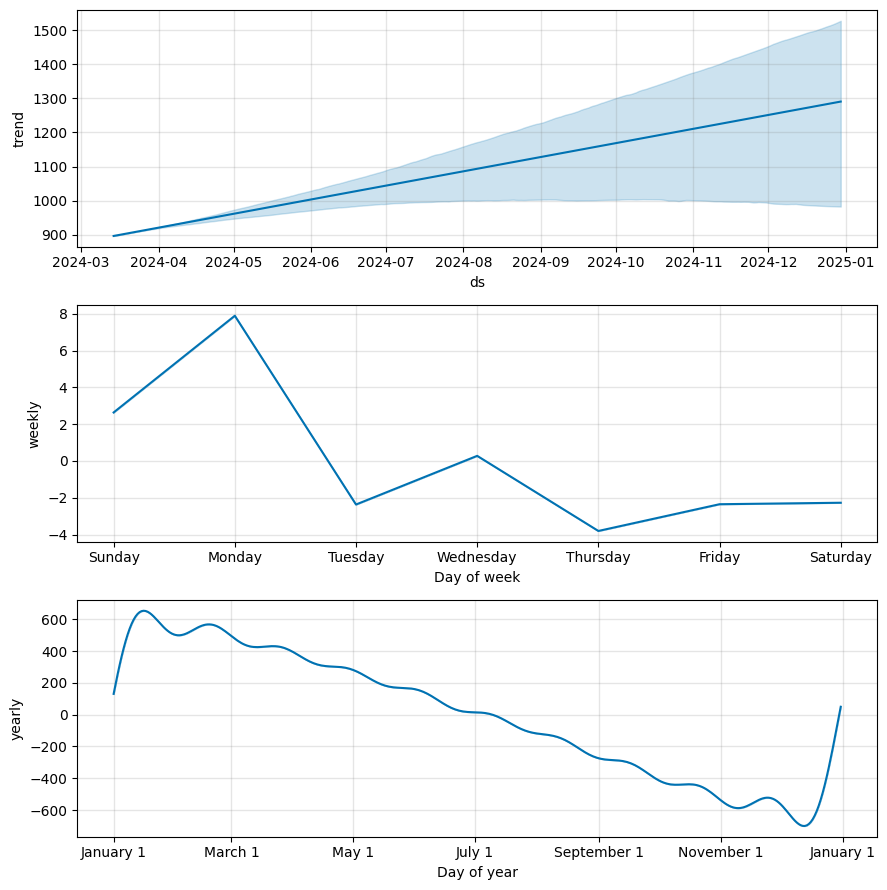

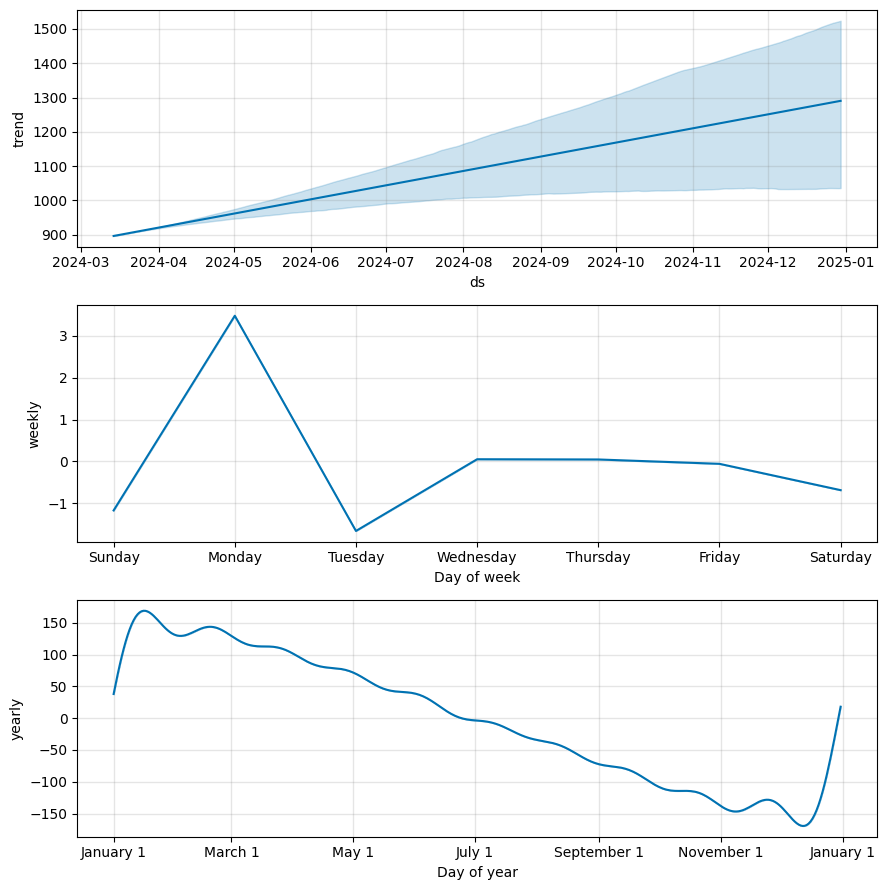

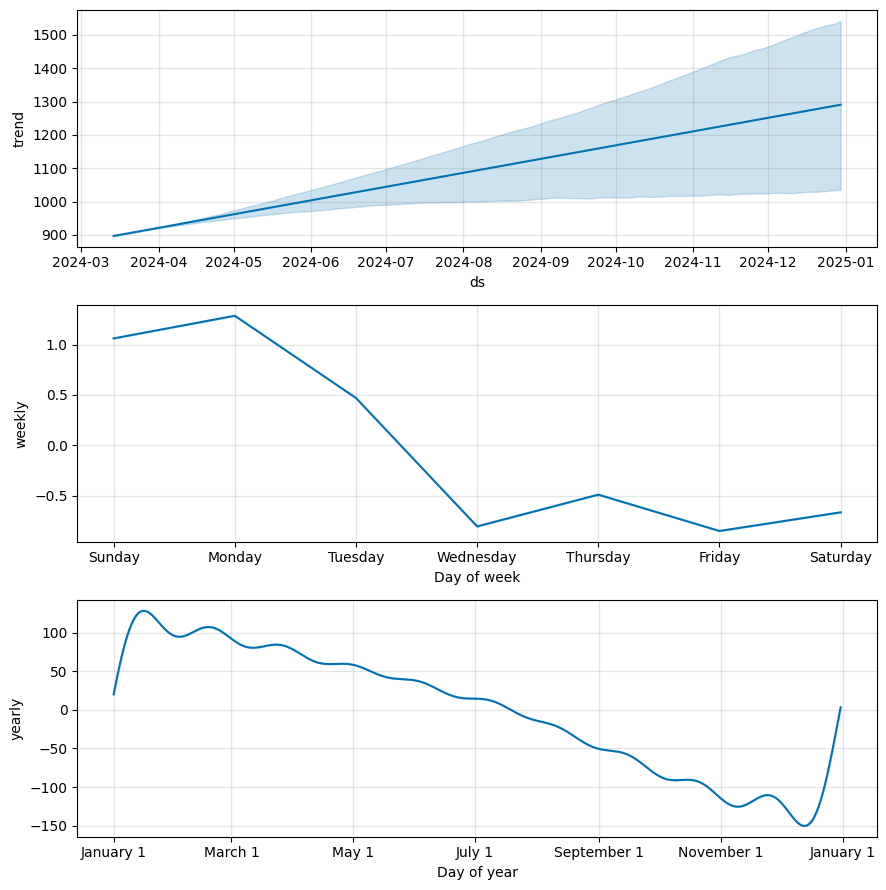

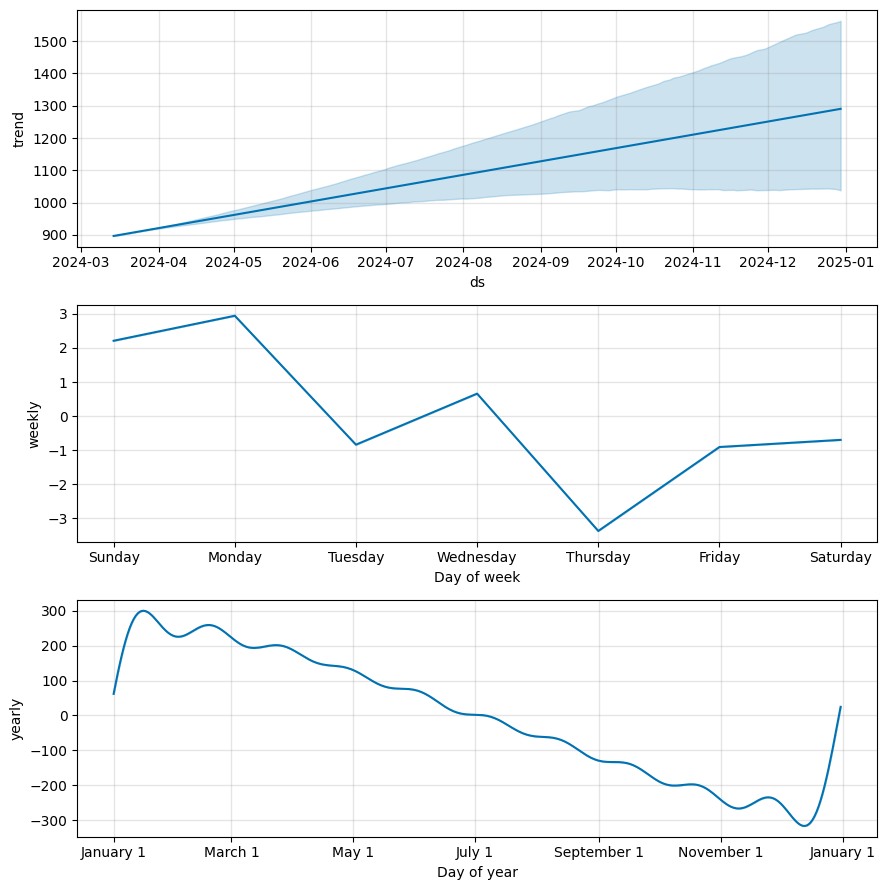

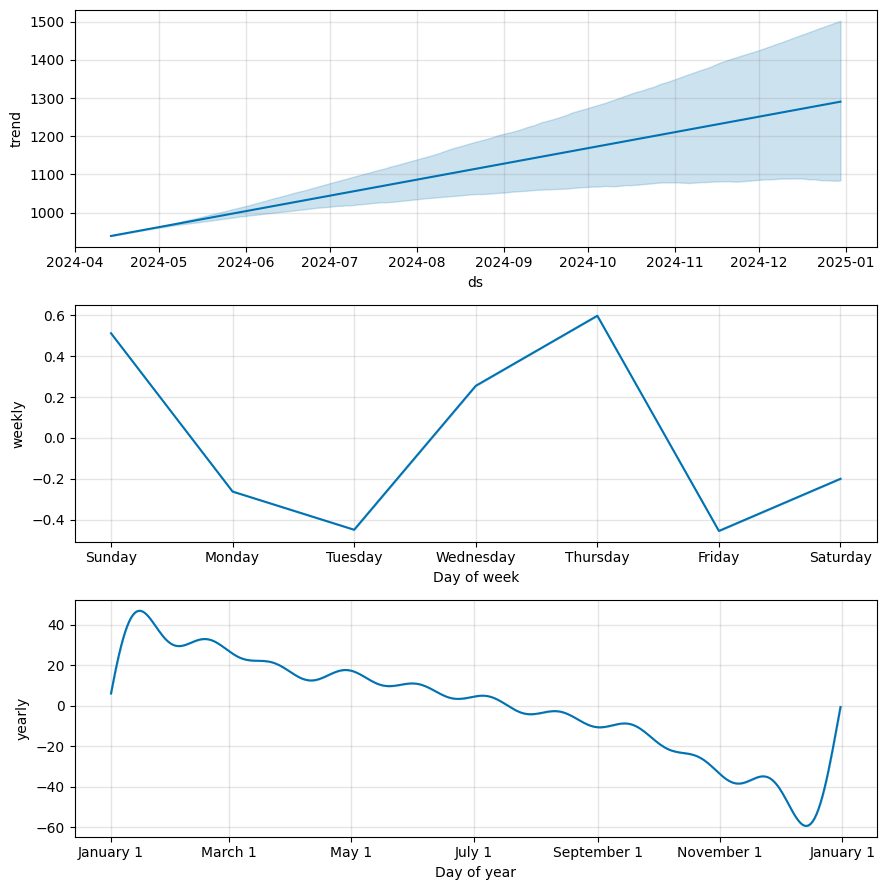

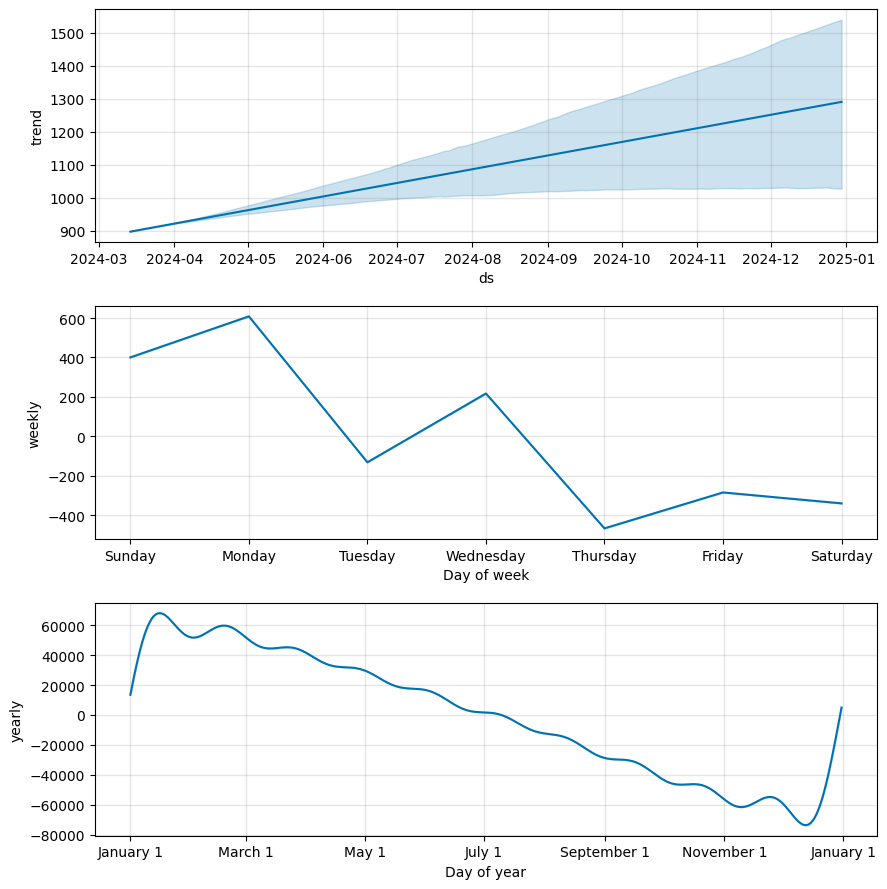

In [19]:
fig = users_model.plot_components(test_users_forcast)
plt.show()

fig = transactions_model.plot_components(test_transactions_forcast)
plt.show()

fig = deposits_model.plot_components(test_deposits_forcast)
plt.show()

fig = withdrawals_model.plot_components(test_withdrawals_forcast)
plt.show()

fig = transfers_model.plot_components(test_transfers_forcast)
plt.show()

fig = payments_model.plot_components(test_payments_forcast)
plt.show()

fig = profits_model.plot_components(test_profits_forcast)
plt.show()

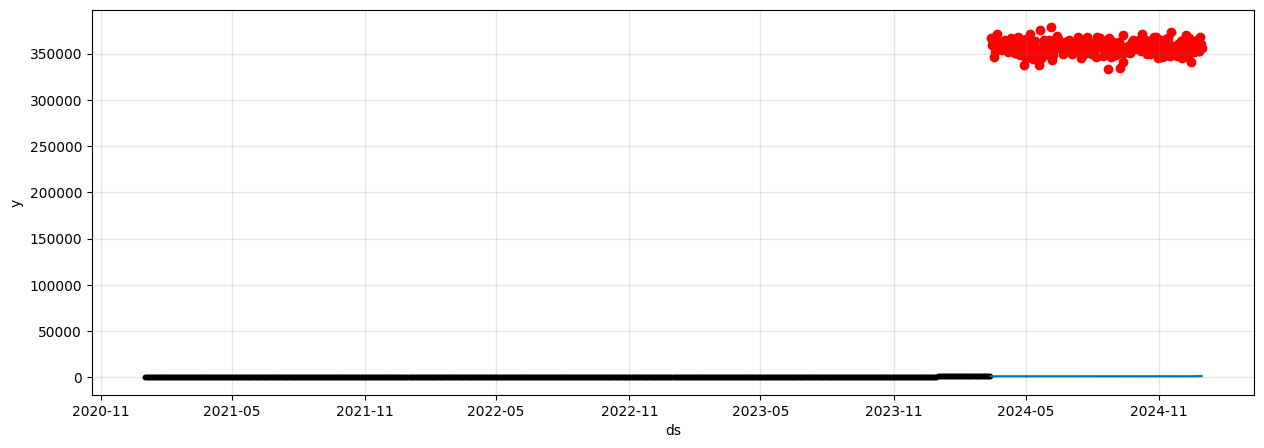

In [32]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_profits['ds'], test_profits['y'], color='r')
fig = users_model.plot(test_profits_forcast, ax=ax)

**Evaute models**

In [31]:
print('Transactions Model Evaluation')
# Mean Absolute Error
mae = mean_absolute_error(test_profits['y'], test_profits_forcast['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(test_profits['y'], test_profits_forcast['yhat'])
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-Squared (R²)
r2 = r2_score(test_profits['y'], test_profits_forcast['yhat'])
print(f"R-Squared (R²): {r2}")

# mean absolute percentage error
mape = mean_absolute_percentage_error(test_profits['y'], test_profits_forcast['yhat'])
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Transactions Model Evaluation
Mean Absolute Error (MAE): 355879.1372816981
Mean Squared Error (MSE): 126694598565.69301
Root Mean Squared Error (RMSE): 355941.8471684567
R-Squared (R²): -2837.3092243054307
Mean Absolute Percentage Error (MAPE): nan


In [25]:
print('Profits Model Evaluation')
# Mean Absolute Error
mae = mean_absolute_error(test_users['y'], test_users_forcast['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(test_users['y'], test_users_forcast['yhat'])
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-Squared (R²)
r2 = r2_score(test_users['y'], test_users_forcast['yhat'])
print(f"R-Squared (R²): {r2}")

# mean absolute percentage error
mape = mean_absolute_percentage_error(test_users['y'], test_users_forcast['yhat'])
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Profits Model Evaluation
Mean Absolute Error (MAE): 32.89586311250951
Mean Squared Error (MSE): 2025.2163193076874
Root Mean Squared Error (RMSE): 45.00240348367726
R-Squared (R²): -1.1671614549610623
Mean Absolute Percentage Error (MAPE): 3.1662085600196193


In [ ]:
print('Users Model Evaluation')
# Mean Absolute Error
mae = mean_absolute_error(test_users['y'], test_users_forcast['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(test_users['y'], test_users_forcast['yhat'])
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-Squared (R²)
r2 = r2_score(test_users['y'], test_users_forcast['yhat'])
print(f"R-Squared (R²): {r2}")

# mean absolute percentage error
mape = mean_absolute_percentage_error(test_users['y'], test_users_forcast['yhat'])
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Users Model Evaluation
Mean Absolute Error (MAE): 4.186250772089275
Mean Squared Error (MSE): 27.882206665385088
Root Mean Squared Error (RMSE): 5.280360467372004
R-Squared (R²): -0.04095865674532417
Mean Absolute Percentage Error (MAPE): 16.53951364375059


**Predict into future**

In [36]:
users_future = users_model.make_future_dataframe(
    periods=365,  # 365 days for one year
    freq='D',     # daily frequency (change 'h' for hourly if needed)
    include_history=False  # Only predict the future, no past data
)

users_prediction = users_model.predict(users_future)

In [37]:
print(users_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][200:-1])  # Display forecasted values

            ds         yhat   yhat_lower   yhat_upper
200 2024-09-30  1041.798755   887.928824  1189.232597
201 2024-10-01  1037.644353   877.697728  1173.713091
202 2024-10-02  1038.176194   882.397290  1185.190309
203 2024-10-03  1035.351965   875.392359  1183.841887
204 2024-10-04  1033.181971   879.550861  1181.267343
..         ...          ...          ...          ...
359 2025-03-08  1516.501526  1172.968348  1873.716583
360 2025-03-09  1517.980480  1165.764945  1870.397465
361 2025-03-10  1519.639611  1164.310677  1870.352535
362 2025-03-11  1517.147264  1161.610873  1870.217439
363 2025-03-12  1519.398041  1171.537940  1869.696308

[164 rows x 4 columns]


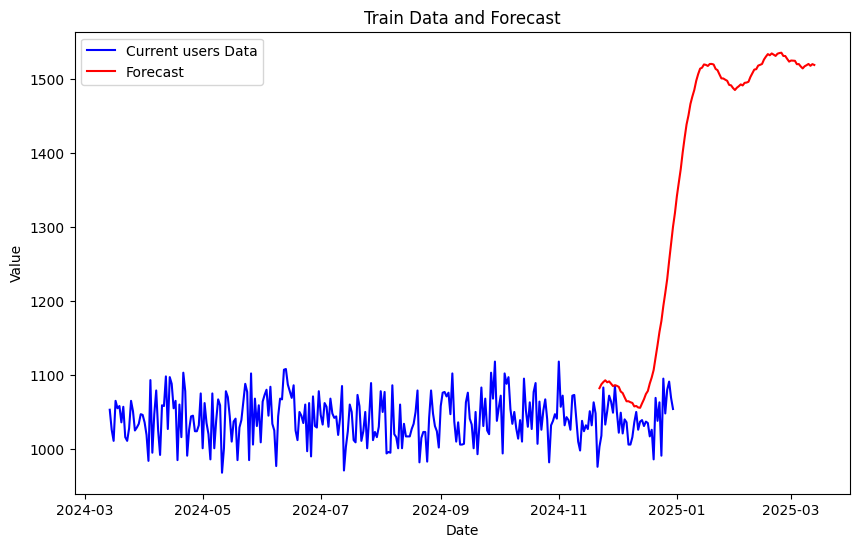

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(test_users['ds'], test_users['y'], label='Current users Data', color='blue')
plt.plot(users_prediction[users_prediction['ds'] > '2024-11-21']['ds'],
         users_prediction[users_prediction['ds'] > '2024-11-21']['yhat'],
         label='Forecast', color='red')


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train Data and Forecast')
plt.legend()

plt.show()

**Saving models**

In [39]:
joblib.dump(users_model, 'users_model.pkl')
print("Model saved successfully!")

joblib.dump(transactions_model, 'transactions_model.pkl')
print("Model saved successfully!")

joblib.dump(deposits_model, 'deposits_model.pkl')
print("Model saved successfully!")

joblib.dump(withdrawals_model, 'withdrawals_model.pkl')
print("Model saved successfully!")

joblib.dump(payments_model, 'payments_model.pkl')
print("Model saved successfully!")

joblib.dump(transfers_model, 'transfers_model.pkl')
print("Model saved successfully!")

joblib.dump(profits_model, 'profits_model.pkl')
print("Model saved successfully!")

Model saved successfully!
Model saved successfully!
Model saved successfully!
Model saved successfully!
Model saved successfully!
Model saved successfully!
Model saved successfully!
